# CSCE 5380 Spring 2018 - Data Mining - Lab Assignment 1 - Task 2
Constant Marks

<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-3:-Cross-validation-and-ROC-Curve" data-toc-modified-id="Problem-3:-Cross-validation-and-ROC-Curve-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 3: Cross-validation and ROC Curve</a></span><ul class="toc-item"><li><span><a href="#Question-1." data-toc-modified-id="Question-1.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 1.</a></span></li></ul></li><li><span><a href="#Problem-4:-Percentage-Split" data-toc-modified-id="Problem-4:-Percentage-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 4: Percentage Split</a></span><ul class="toc-item"><li><span><a href="#Question-1." data-toc-modified-id="Question-1.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question 1.</a></span></li></ul></li></ul></div>

## Problem 3: Cross-validation and ROC Curve

First we run the Random Forest and Naive Bayes classifier with 5 folds on the Mushroom data set.

In [7]:
from scipy.io.arff import loadarff
with open('data/mushroom.arff', 'r') as f:
    data, meta = loadarff(f)
print(data[0],'\n')
print('There are %d records: ' % (data.size))

(b"'x'", b"'s'", b"'n'", b"'t'", b"'p'", b"'f'", b"'c'", b"'n'", b"'k'", b"'e'", b"'e'", b"'s'", b"'s'", b"'w'", b"'w'", b"'p'", b"'w'", b"'o'", b"'p'", b"'k'", b"'s'", b"'u'", b"'p'") 

There are 8124 records: 


In [8]:
X = data[meta.names()[0:-1]]
import numpy as np
X = np.asarray(X.tolist())

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(np.shape(X)[1]):
    X[:,i] = labelencoder_X.fit_transform(X[:, i])
X = X.astype(int)
print(X[0:5],'\n')

[[5 2 4 1 6 1 0 1 4 0 2 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 9 1 0 1 0 0 4 0 1 2 2 7 7 0 2 1 4 3 2 1]
 [0 2 8 1 3 1 0 0 5 0 1 2 2 7 7 0 2 1 4 3 2 3]
 [5 3 8 1 6 1 0 1 5 0 2 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 3 0 5 1 1 0 4 1 2 2 2 7 7 0 2 1 0 3 0 1]] 



In [9]:
y = data[meta.names()[-1]]
labels = np.unique(y).astype(str)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
bin_count = np.bincount(y)
label_freq = np.array([labels, np.unique(y),bin_count])
print('Class Frequencies: \n',label_freq)

Class Frequencies: 
 [["'e'" "'p'"]
 ['0' '1']
 ['4208' '3916']]


In [10]:
# Splitting data into test and training set choosing a 25% sample Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Creating the Naive Bayes Classifier and Calculating Cross-Val Score with 5 folds
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)
nb_scores= cross_val_score(nb_classifier, X_train, y_train, cv=5)
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)\n" % (nb_scores.mean(), nb_scores.std() * 2))

# Creating the Random Forest Classifier and Calculating Cross-Val Score with 5 folds
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)\n" % (rf_scores.mean(), rf_scores.std() * 2))



Naive Bayes Accuracy: 0.92 (+/- 0.02)

Random Forest Accuracy: 1.00 (+/- 0.00)



### Question 1.

Run each of the NB and RF classifier once by a certain value for number of folds for cross-validation (e.g. 5 folds). 

For the results obtained, generate a [ROC curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) for the class “p” (poisonous) for both the classifiers.

   **Answer:** See above for resutls for cross validation score. The ROC Curve for poisonus mushrooms is shown below.

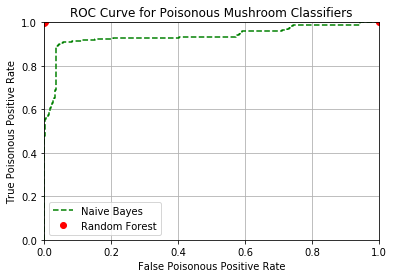

In [12]:
# Get the NB binary probability for the Poisonous Class
nb_y_pred_prob = nb_classifier.predict_proba(X_test)[:,1]

# Import ROC function and find ROC metrics for NB
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, nb_y_pred_prob)

# Get the RF binary probability for the Poisonous Class
rf_classifier.fit(X_train, y_train)
rf_y_pred_prob = rf_classifier.predict_proba(X_test)[:,1]

# find ROC metrics for rf
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf_y_pred_prob)

# Plot the ROC Curves
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr1,tpr1, 'g--', fpr2, tpr2,'ro')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve for Poisonous Mushroom Classifiers')
plt.xlabel('False Poisonous Positive Rate')
plt.ylabel('True Poisonous Positive Rate')
plt.grid(True)
plt.legend(['Naive Bayes','Random Forest'])


## Problem 4: Percentage Split

### Question 1.

Run each of the NB and RF classifier once by selecting a certain percentage of training data (e.g. 40%).

For the results obtained, generate a ROC curve for the class “e” (edible) for both the classifiers.

**Answer:** See the ROC curve for edible mushrooms below.

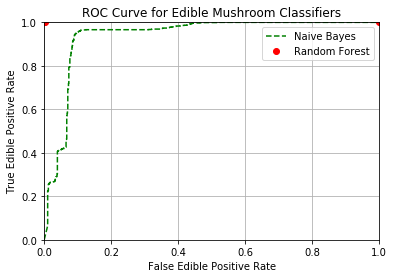

In [13]:
# Get the NB binary probability for the Poisonous Class
nb_y_pred_prob = nb_classifier.predict_proba(X_test)[:,0]

# Import ROC function and find ROC metrics for NB
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, nb_y_pred_prob, pos_label = 0)

# Get the RF binary probability for the Poisonous Class
rf_classifier.fit(X_train, y_train)
rf_y_pred_prob = rf_classifier.predict_proba(X_test)[:,0]

# find ROC metrics for rf
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf_y_pred_prob, pos_label = 0)


# Plot the ROC Curves
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr1,tpr1, 'g--', fpr2, tpr2,'ro')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve for Edible Mushroom Classifiers')
plt.xlabel('False Edible Positive Rate')
plt.ylabel('True Edible Positive Rate')
plt.grid(True)
plt.legend(['Naive Bayes','Random Forest'])